In [54]:
# Copyright Spatial Analytics 2017
# Use of this code is permitted only for the express purpose for which it was provided.
# This is a Python 2.7 Script
#
# If you use this, or a derivative of it to make money, send a portion to the original author
# At least let him know it was useful and what cool stuff you did. 
# simon.allen@spatialanalytics.com.au

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
%matplotlib inline 
import os

In [59]:
#script expects images in a directory called images in a project directory under a base directory location
#images will be basedirectory + projectname + images
#all other files (input and output) should be in the project directory
basedirectory = 'c:/Users/Simon/'
projectname = 'Temp'
Pix4D_filename = 'mission.pix4dcapture-mission'
PPK_filename = 'POS.pos'
imagepath = basedirectory+projectname+'/images/'




In [44]:
#Works with Pix4D capture october 2017


df_pix4D = pd.read_json(basedirectory+projectname+'/'+Pix4D_filename, typ = 'series')



images_json = df_pix4D['actual']['photos']

In [7]:
from pandas.io.json import json_normalize
almost_drone = json_normalize(images_json)


In [8]:
drone_time = almost_drone['mediaDescriptor.mediaMetaData.timeCreated']


In [9]:
drone_positions = almost_drone['pose.location']


In [10]:
drone_lon, drone_lat,drone_alt = zip(*drone_positions)


In [11]:
drone_images = almost_drone['mediaDescriptor.mediaId']


In [12]:
drone_milliseconds = almost_drone['pose.time']


In [13]:
drone = pd.DataFrame({'time_sec' : drone_milliseconds,
                       'rel_alt' : drone_alt,
                       'drone_lon' : drone_lon,
                       'drone_lat' : drone_lat,
                       'evnt': drone_images,
                       'local_time': drone_time
                      })


#df_drone = pd.DataFrame(('','','drone_lon','drone_lat','drone_images','drone_time'))

In [14]:
drone.head()

,drone_lat,drone_lon,evnt,local_time,rel_alt,time_sec
0,-42.880718,147.397564,DJI_0979.jpg,2017-10-23 14:44:24,49.6,1.508730e+09
1,-42.880866,147.397502,DJI_0980.jpg,2017-10-23 14:44:34,50.0,1.508730e+09
2,-42.880984,147.397454,DJI_0981.jpg,2017-10-23 14:44:36,49.9,1.508730e+09
3,-42.881113,147.397403,DJI_0982.jpg,2017-10-23 14:44:40,49.9,1.508730e+09
4,-42.881088,147.397268,DJI_0983.jpg,2017-10-23 14:44:50,49.8,1.508730e+09


In [15]:
# Pix4D have a habit of changing the descriptors as they think of more things to add. 
# above you have the raw image data, it is a rich source of useful stuff that I currently don't use.
# I just extract the bits needed (for the moment)
# Of course this script could be messed up at any time by Pix4D changing the format of the file.


In [16]:
#sometimes Pix4Dcapture fails to assign a time to an image!
#remove those images :-(

num_images = drone['rel_alt'].describe()['count']
drone2 = drone.loc[drone['time_sec']<>0]
num_images_time = drone2['rel_alt'].describe()['count']

print('number of images =',int(num_images),' with timing ', int(num_images_time))



('number of images =', 27, ' with timing ', 27)


In [18]:

drone2['new_time'] = dt.datetime(1970,1,1)+pd.to_timedelta(drone2['time_sec'], unit='s')

In [19]:
drone2.head(3)

,drone_lat,drone_lon,evnt,local_time,rel_alt,time_sec,new_time
0,-42.880718,147.397564,DJI_0979.jpg,2017-10-23 14:44:24,49.6,1.508730e+09,2017-10-23 03:44:25.426307
1,-42.880866,147.397502,DJI_0980.jpg,2017-10-23 14:44:34,50.0,1.508730e+09,2017-10-23 03:44:34.326682
2,-42.880984,147.397454,DJI_0981.jpg,2017-10-23 14:44:36,49.9,1.508730e+09,2017-10-23 03:44:36.842951


In [45]:
#import PPK assumes you used the LLH format with the header turned on

filename = basedirectory+projectname+'/'+PPK_filename
columns = [ 0,1,2,3,4,5,6,7,8,9]
column_names = ['rtk_date','utc', 'rtk_lat','rtk_lon','rtk_alt','Q','num_sat','sd_n','sd_e','sd_u']
rtk = pd.read_csv(filename,skiprows=26,
                  delim_whitespace=1,
                  usecols=columns,
                  names=column_names,
                  parse_dates=[['rtk_date','utc']]
                  )


In [46]:
rtk.head(3)

,rtk_date_utc,rtk_lat,rtk_lon,rtk_alt,Q,num_sat,sd_n,sd_e,sd_u
0,2017-10-23 03:33:39.400,-42.880585,147.397309,24.4440,2,8,0.6936,0.5560,1.6646
1,2017-10-23 03:33:39.600,-42.880593,147.397297,21.0959,2,8,0.4931,0.3956,1.1870
2,2017-10-23 03:33:39.800,-42.880601,147.397299,16.9691,2,9,0.3932,0.3183,0.9459


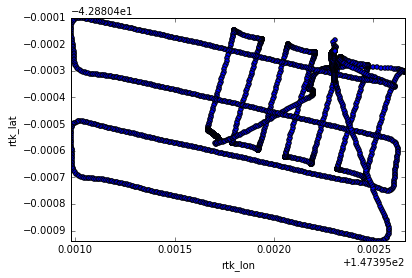

In [28]:
rtk.plot.scatter(x='rtk_lon',y='rtk_lat',style ='.')
plt.axis((rtk['rtk_lon'].min(),
          rtk['rtk_lon'].max(),
          rtk['rtk_lat'].min(),
          rtk['rtk_lat'].max()))
plt.show()

In [30]:

drone2['drone_date_utc'] = drone2['new_time']

In [31]:
drone2.head()


,drone_lat,drone_lon,evnt,local_time,rel_alt,time_sec,new_time,drone_date_utc
0,-42.880718,147.397564,DJI_0979.jpg,2017-10-23 14:44:24,49.6,1.508730e+09,2017-10-23 03:44:25.426307,2017-10-23 03:44:25.426307
1,-42.880866,147.397502,DJI_0980.jpg,2017-10-23 14:44:34,50.0,1.508730e+09,2017-10-23 03:44:34.326682,2017-10-23 03:44:34.326682
2,-42.880984,147.397454,DJI_0981.jpg,2017-10-23 14:44:36,49.9,1.508730e+09,2017-10-23 03:44:36.842951,2017-10-23 03:44:36.842951
3,-42.881113,147.397403,DJI_0982.jpg,2017-10-23 14:44:40,49.9,1.508730e+09,2017-10-23 03:44:41.127383,2017-10-23 03:44:41.127383
4,-42.881088,147.397268,DJI_0983.jpg,2017-10-23 14:44:50,49.8,1.508730e+09,2017-10-23 03:44:50.327494,2017-10-23 03:44:50.327494


In [32]:
#Now I need to index the dataframes by their datetime columns
drone_utc = drone2.set_index('drone_date_utc')

In [33]:
rtk_utc = rtk.set_index('rtk_date_utc')

In [34]:
merged_data = pd.merge(drone_utc,rtk_utc,how='outer',left_index=True, right_index=True)


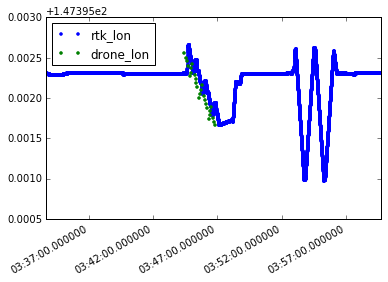

In [35]:
merged_data[['rtk_lon','drone_lon']][3:].plot(style ='.')
plt.show()

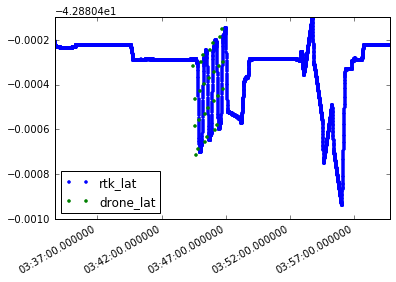

In [36]:
merged_data[['rtk_lat','drone_lat']][3:].plot(style ='.')
plt.show()

In [37]:
merged_data['drone_rtk_lat'] = merged_data['rtk_lat'].interpolate(method='linear')
merged_data['drone_rtk_lon'] = merged_data['rtk_lon'].interpolate(method='linear')
merged_data['drone_rtk_alt'] = merged_data['rtk_alt'].interpolate(method='linear')
# if you want more fields brought through to the final final just add more lines here

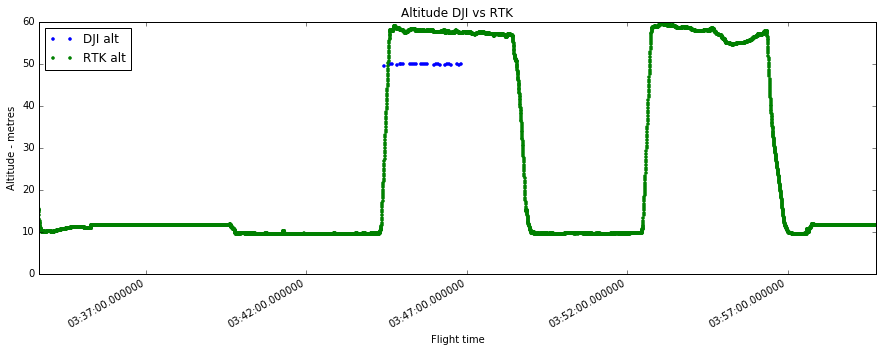

In [38]:
plt.figure(figsize=(15,5))
merged_data['rel_alt'][4:].plot(style = '.', label = 'DJI alt')
merged_data['rtk_alt'][4:].plot(style = '.', label = 'RTK alt')
plt.legend(loc='upper left')
plt.title("Altitude DJI vs RTK")
plt.xlabel("Flight time")
plt.ylabel("Altitude - metres")
plt.show()

In [39]:
#get the ground altitude from the modal value of the rtk data
ground_alt = merged_data['rtk_alt'].mode()[0]
ground_alt

11.7667

In [40]:
#if you want to export all the data merged do so now.
#merged_data.to_csv(projectname+'_alldata.csv')

In [41]:
#get rid of all the PPK data with no photos and the empty fields
reduced = merged_data.loc[merged_data['time_sec'].notnull()]
compacted = reduced[['new_time','drone_rtk_lat','drone_rtk_lon','drone_rtk_alt','drone_lat','drone_lon','rel_alt','evnt']]


In [49]:
#Save
compacted.to_csv(basedirectory+projectname+'/'+projectname+'_images.csv')

In [50]:
#Convert to something to use in exiftool

imagepath = basedirectory+projectname+'/images'
for_exiftool = compacted[['evnt','drone_rtk_lat','drone_rtk_lon','drone_rtk_alt']]
for_exiftool['evnt']=imagepath+'/'+for_exiftool['evnt']

for_exiftool.rename(columns={'evnt' : 'SourceFile',
                              'drone_rtk_lat' : 'GPSLatitude',
                              'drone_rtk_lon' : 'GPSLongitude',
                              'drone_rtk_alt' : 'GPSAltitude'},inplace=True)

# Gives a 'poor code warning' but works

C:\Users\Simon\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Simon\Anaconda2\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [51]:
#Save
for_exiftool[['SourceFile','GPSLatitude','GPSLongitude','GPSAltitude']].to_csv(basedirectory+projectname+'/'+projectname+'_exiftool.csv',index=False)

In [60]:
# could call out to OS and run this but sometimes I work across systems and it is easier to just cut and paste command line

EXIFtool_command = 'exiftool'+' -csv="'+basedirectory+projectname+'_exiftool.csv" '+imagepath

EXIFtool_command


#  exiftool -csv="FILE GENERATED ABOVE" /path/from/root/to/your/images

'exiftool -csv="c:/Users/Simon/Temp_exiftool.csv" c:/Users/Simon/Temp/images/'

In [62]:
#biggest bug bear is capitalisation or not across file systems
# if you have exiftool installed make sure the directory is right below and try this. status appears in the terminal/cmd window.

EXIFtool_command = 'C:/progs/exiftool'+' -csv="'+basedirectory+projectname+'/'+projectname+'_exiftool.csv" '+imagepath

if os.system(EXIFtool_command)==0:
    print('image EXIF headers now contain RTK data, sort by date modified and look for files which were not modified')
else:
    print('there appears to have been a problem')
    


image EXIF headers now contain RTK data, sort by date modified and look for files which were not modified
